# FeynMP

In [1]:
from pyfeyn2.feynmandiagram import FeynmanDiagram, Leg, Propagator, Vertex
from pyfeyn2.render.latex.feynmp import FeynmpRender
from pyfeyn2.render.latex.dot import feynman_adjust_points
import pyfeyn2
print(pyfeyn2.__version__)

2.0.5.16


In [2]:
fd = FeynmanDiagram()
v1 = Vertex("v1").with_xy(-1, 0)
v2 = Vertex("v2").with_xy(1, 0)
p1 = Propagator("p1").connect(v1, v2).with_type("gluon")
l1 = Leg("l1").with_target(v1).with_xy(-2, 1).with_type("gluon").with_incoming()
l2 = Leg("l2").with_target(v1).with_xy(-2, -1).with_type("gluon").with_incoming()
l3 = Leg("l3").with_target(v2).with_xy(2, 1).with_type("gluon").with_outgoing()
l4 = Leg("l4").with_target(v2).with_xy(2, -1).with_type("gluon").with_outgoing()
p1.with_source(v1)
p1.with_target(v2)
fd.propagators.append(p1)
fd.vertices.extend([v1, v2])
fd.legs.extend([l1, l2, l3, l4])

In [3]:
tfd = FeynmpRender(fd)
print(tfd.get_src())

\documentclass[preview,crop]{standalone}%
\usepackage[T1]{fontenc}%
\usepackage[utf8]{inputenc}%
\usepackage{lmodern}%
\usepackage{textcomp}%
\usepackage{lastpage}%
%
\usepackage{feynmp-auto}%
%
\begin{document}%
\normalsize%
\begin{fmffile}{tmp-5254d2fcf13d41269073c8f07ecb2b66}
\begin{fmfgraph*}(120,80)
		\fmfleft{l1,l2}
		\fmfright{l3,l4}
		\fmf{gluon}{l1,v1}
		\fmf{gluon}{l2,v1}
		\fmf{gluon}{v2,l3}
		\fmf{gluon}{v2,l4}
		\fmf{gluon}{v1,v2}
\end{fmfgraph*}
\end{fmffile}
%
\end{document}


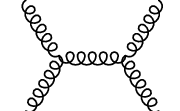

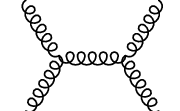

In [4]:
tfd.render()

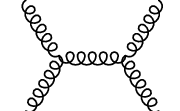

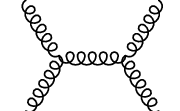

In [5]:
tfd.render("test.pdf")